# Recommendation Systems and Artist Recommendation with Collaborative Filtering and Cosine Distance

# Introduction

Spotify, iTunes and other different music applications have surprised us with recommending music, artists, albums etc. that resembles our taste in music. Many of us have wondered how does their recommendation system come up with so accurate selections.
This tutorial will introduce you to the mechanics of how a recommendation system works. It will also talk about how can you use Collaborative filtering and Cosine distance to recommend artists.

Recommendation Systems are generally developed using either of the methods mentioned below - <br>
A. Content Based Systems <br>
B. Collaborative Filtering <br>
C. Hybrid Systems (which use the combination of Content Based Systems and Collaborative Filtering) <br>

Let's understand how these methods work. 

# Collaborative Filtering

Collaborative filtering is the most common method for implementing a recommender. The idea of collaborative filtering is to determine the users' preferences from historical usage data. For example - if two users listen to largely the same set of songs, their taste in music is probably similiar. Conversely, if two songs are listened to by the same group of users, they probably sound similiar. This method is used by Spotify to recommend music.
<br><br>
Let's discuss the mechanics of Collaborative filtering. It uses the KNN (K nearest neighbours) technique. The music taste of users calculates the distance between different users. This method essentially searches for users (nieghbours) who share the same taste in music and based on this information recommends music. Therefore, the
recommender predicts users preferences with by user-item relationship. It can be compared to a friend's recommendation in real life. Figure 1 below shows the real life example.

<img src="friends.PNG">
<font color='gray'><i><center>Figure 1: Image by Erik Bernhardsson</center></i></font>

Pure Collaborative filtering doesn't use any kind of information about the items that are being recommended except for the consumption pattern associated with it. Recommenders that use this technique are called "Content Agnostic". That this why, this method can be applied to variety of items such as Music, Books, Movies etc. Unfortunately, this is also the biggest flaw of this method. Since this method relies on usage data, popular items are recommended more than unpopular items as there is more data usage of the popular items. This is generally the opposite of what a company/user wants. For the same reason recommendations can turn out to be boring and predictable.
<br><br>
Another issue that is more specific to music, is the heterogeneity of content with similar usage patterns. For example, users may listen to entire albums in one go, but albums may contain intro tracks, outro tracks, interludes, cover songs and remixes. These items are atypical for the artist in question, so they aren’t good recommendations. Collaborative filtering algorithms will not pick up on this.
<br><br>
Nonetheless, this is one of the most popular recommendation method. 
<br><br>
Collaborative filtering can further be divided into three types:
<br>
A. Memory based method <br>
B. Model based method <br>
C. Hybrid method (Combines both memory and model based method)

### Memory Based Method
Predicts items based on the complete collection of previous ratings. Uses algorithms such as the neighbourhood based filtering and item-based top-N recommendations to find user groups with people that have the same taste in music.

### Model Based Method
Uses machine learning techniques to train and model user's preferences and then does the prediction on the test data using the trained model.

### Hybrid Method
Combines memory based and model based methods and hence outperforms both individual models.

To solve the issues in Collaborative filtering, content based systems come into picture.

# Content Based Systems
This recommendation method is more based on item information. For example music has following information associated with it - tags, artist and album information, lyrics, text mined from the web (reviews, interviews etc.), and the audio signal itself. This system uses these details to make recommendations. This data can be used for recommedation by using either - <br>
A. Natural Language Processing (NLP) <br>
B. Raw Audio Models

### Natural Language Processing (NLP)
Natural Language Processing is the ability of computer to understand human speech as it is spoken. This is many times achieved using Sentiment Analysis. Python has a lot of sentiment analysis APIs if one wants to explore more about it. Here only very high level description of this method is given.
<br><br>
Let's take the example of Spotify. What does Spotify do?
Spotify constantly checks web for blog data and other online written texts about music. From this data it tries to figure out what everyone is saying about a specific artist or album. It captures frequently used adjectives and words associated with a particular item (in this case - artist, music) and also which other artists and music is associated. After the data has been scraped from the internet, they bucket them up into what they call “cultural vectors” or “top terms". Each item has thousands of daily-changing top terms. Each term has a weight associated, which tells the the probability that someone will describe music as that term. Figure 2 shows how each item has weight associated with it.

<img src="terms.PNG">
<font color='gray'><i><center>Figure 2: “Cultural vectors”, or “top terms”. Table from Brian Whitman</center></i></font>

### Raw Audio Models
Audio signals are probably the most difficult data to use effectively. Since there is a huge gap between the music audio and the various aspects of the music that affect users' preferences. Some features are easy to extract from the audio signal such as genre of the music and the instruments used. Some features are very difficult to extract such as the name of the artist, year of the music release or the mood of the music. Some features are impossible to extract such as the geographical location of the artist or the lyrical themes. Despite all the challenges, actual sound of the music plays a important role in determining whether a user will like the music or not. 
<br><br>
You're probably thinking that we already have two good and fairly easy methods to understand and recommend music. Why do we need this complicated model? Audio models play a very important role because they don't discrimate. Unlike other methods which depend on the number of occurences on internet (consider only popular music), audio models don't discrimate between new music and popular music.

## Motivation behind talking about different models
This tutorial talks about the basics of each method even though it just implements Collaborative Filtering so that a reader knows what other methods exist and how different they are from the method implemented in this tutorial.

# Artist Recommendation with Collaborative Filtering and Cosine Distance
We're using item based Collaborative filtering to make recommendations. This means our recommendations will be based on user patterns in listening to artists.

## Finding a Dataset for recommendation
The page https://gist.github.com/entaroadun/1653794 has some really cool datasets. Since this tutorial is about recommending music, music dataset is used here.
<br><br>
The Last.fm data are from the Music Technology Group at the Universitat Pompeu Fabra in Barcelona, Spain. The data was scraped by Òscar Celma using the Last.fm API, and it is available for free for non-commercial use.
<br><br>
The music data is divided into two parts -<br>
A. Activity data: comprises of 360,000 individual users’ Last.fm artist listening information. It tells how many times a Last.fm user played songs by various artists.<br>
B. Profile data: contains users' information. <br>
<br>
Dataset can be directly downloaded from http://www.dtic.upf.edu/~ocelma/MusicRecommendationDataset/index.html.

Python libraries used in this process are - pandas and numpy

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

Sets decimal options in pandas library.

In [2]:
# display results to 3 decimal points, not in scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

The code below uses pandas read_table to read files in tab separated format (tsv). I have added only a few useful columns from the dataset in the dataframe.

In [3]:
# Reads table from Activity data
user_data = pd.read_table('user-artist-play.tsv',
                          header = None, nrows = 2e7,
                          names = ['users', 'musicbrainz-artist-id', 'artist-name', 'plays'],
                          usecols = ['users', 'artist-name', 'plays'])

In [4]:
# Reads table from Profile Data
user_profiles = pd.read_table('user-profile.tsv',
                          header = None,
                          names = ['users', 'gender', 'age', 'country', 'signup'],
                          usecols = ['users', 'country'])

Let's look at the data.

In [5]:
# User activity data format 
user_data.head()

,users,artist-name,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706


In [6]:
# User profile data format
user_profiles.head()

,users,country
0,00000c289a1829a808ac09c00daf10bc3c4e223b,Germany
1,00001411dc427966b17297bf4d69e7e193135d89,Canada
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,Germany
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,Mexico
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,United States


## Filtering to only Popular Artists

Lesser known artists will have few listeners. Since we're using item based collabortive filtering which depends on popular choices, lesser known artists will make the pattern noisy. This can result in bad recommendations. It's good to remove these artists from the dataset.

First we remove all the rows where artist name is null.

In [7]:
if user_data['artist-name'].isnull().sum() > 0:
    user_data = user_data.dropna(axis = 0, subset = ['artist-name'])

To determine which artists are popular, we calculate total play count of every artist. Since we have artist name in every row, we need to group data based on artist name to get the total play count.

In [8]:
# Groups by Artist name
artist_plays = (user_data.
     groupby(by = ['artist-name'])['plays'].
     sum().
     reset_index().
     rename(columns = {'plays': 'total_artist_plays'})
     [['artist-name', 'total_artist_plays']]
    )
# Sorts the dataframe based of toal play counts in descending order
artist_plays = artist_plays.sort_values(by='total_artist_plays', ascending=False)

# Selects the total 5 popular artists
artist_plays.head()

,artist-name,total_artist_plays
252495,the beatles,30466827
217884,radiohead,27426234
73856,coldplay,16686772
212497,pink floyd,15943557
186241,metallica,15481852


In [9]:
# Total artists in the dataset
len(artist_plays)

292364

Now we merge the user data with the artist data to know which artists are lesser played artist.

In [10]:
user_data_with_artist_plays = user_data.merge(artist_plays, left_on = 'artist-name', right_on = 'artist-name', how = 'left')
user_data_with_artist_plays.head()

,users,artist-name,plays,total_artist_plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137,25651
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099,3704875
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897,180391
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717,410725
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706,90498


## Picking a threshold needed to filter artists
We need to find a threshold so that any value after the threshold value can be filtered out. For this we use describe method to get the statistics of the artist_plays dataframe.

In [11]:
artist_plays['total_artist_plays'].describe()

count     292364.000
mean       12907.037
std       185981.313
min            1.000
25%           53.000
50%          208.000
75%         1048.000
max     30466827.000
Name: total_artist_plays, dtype: float64

From the above data it can be observed that, median artist (at 50 %) has only been played only 208 times.

To get a more clear picture, let's look at the percentile view of the data.

In [12]:
artist_plays['total_artist_plays'].quantile(np.arange(.9, 1, .01))

0.900     6138.000
0.910     7410.000
0.920     9102.960
0.930    11475.590
0.940    14898.440
0.950    19964.250
0.960    28419.880
0.970    43541.330
0.980    79403.440
0.990   198482.590
Name: total_artist_plays, dtype: float64

It can be seen from the distribution that only 1 percent of artists have approx. 200,000 plays or more. Only 2 percent of the artists have 80,000 or more. Only 3 percent of the artists have 44,000 or more. Since we have so many artists, let's limit to only top 3 percent artists. This may seem a little arbitary threshold but still it gets almost 9000 artists which is large enough dataset to make recommendations.

In [13]:
# Threshold set (Number of plays should be greater than or equal to 40,000)
popularity_threshold = 40000
# Selects the artists that has total play count more then 40,000
user_data_popular_artists = user_data_with_artist_plays.query('total_artist_plays >= @popularity_threshold')
user_data_popular_artists.head()

,users,artist-name,plays,total_artist_plays
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099,3704875
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897,180391
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717,410725
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706,90498
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691,13547741


In [14]:
# Total number of unique artists in the dataframe after we have removed data based on threshold
user_data_popular_artists['artist-name'].nunique()

9300

Let's filter some more. Let's filter out the users who are from United States and remove everyone else. There is no specific for this filtering but this will reduce the dataset significantly and hence computation efficiency would improve.

In [15]:
# Combining dataframes to get users' residence country
combined = user_data_popular_artists.merge(user_profiles, left_on = 'users', right_on = 'users', how = 'left')
# Filtering out the data based on Country
usa_data = combined.query('country == \'United States\'')
usa_data.head()

,users,artist-name,plays,total_artist_plays,country
156,00007a47085b9aab8af55f52ec8846ac479ac4fe,devendra banhart,456,2366807,United States
157,00007a47085b9aab8af55f52ec8846ac479ac4fe,boards of canada,407,6115545,United States
158,00007a47085b9aab8af55f52ec8846ac479ac4fe,cocorosie,386,2194862,United States
159,00007a47085b9aab8af55f52ec8846ac479ac4fe,aphex twin,213,4248296,United States
160,00007a47085b9aab8af55f52ec8846ac479ac4fe,animal collective,203,3495537,United States


Before we do any computation, we should be sure that our dataset is internally consistent. This means every user should have only on play count against every artist. So, we need to check if any two rows have same user name and same artist name.

In [16]:
if not usa_data[usa_data.duplicated(['users', 'artist-name'])].empty:
    # Number of rows in the dataframe
    initial_rows = usa_data.shape[0]
    # prints the number of rows before removing duplicates (rows with same user name and artist name)
    print('Initial dataframe shape {0}'.format(usa_data.shape))
    # Drops the rows with duplicates
    usa_data = usa_data.drop_duplicates(['users', 'artist-name'])
    # Number of rows in the dataframe left after removing duplicates
    current_rows = usa_data.shape[0]
    # prints the number of rows after removing duplicates (rows with same user name and artist name)
    print ('New dataframe shape {0}'.format(usa_data.shape))
    # prints number of rows deleted, meaning number of duplicates
    print ('Removed {0} rows'.format(initial_rows - current_rows))

Initial dataframe shape (2788019, 5)
New dataframe shape (2788013, 5)
Removed 6 rows


## Data Visualization

Now, let's try to visualize data after we have done filtering.

Let us see which are the most popular artists in the data.

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
group_data = (usa_data.
     groupby(by = ['artist-name'])['plays'].
     sum().
     reset_index().
     rename(columns = {'plays': 'total_artist_plays'})
     [['artist-name', 'total_artist_plays']]
    )

In [19]:
group_data = group_data.sort_values(by='total_artist_plays', ascending=False)
popular = group_data.head(n = 20)
x = list(popular['artist-name'])
y = list(popular['total_artist_plays'])

In [20]:
group_data.head()

,artist-name,total_artist_plays
7618,the beatles,10705203
6321,radiohead,7931815
2057,death cab for cutie,4956608
5671,nine inch nails,4017063
5351,modest mouse,3848876


<Container object of 20 artists>

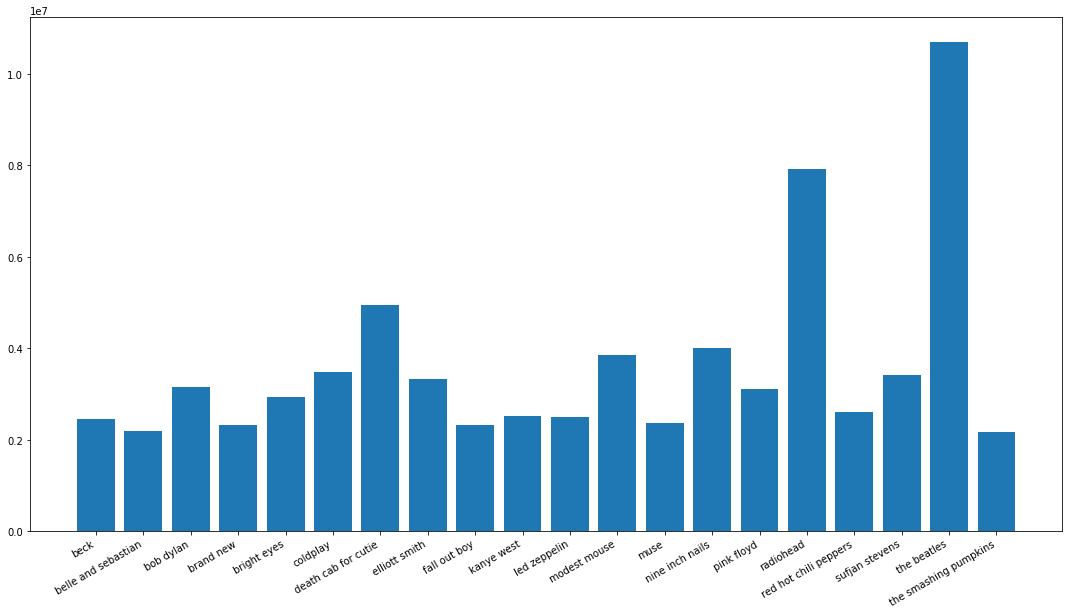

In [21]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
fig.set_size_inches(18.5, 10.5)
plt.bar(x,y)

From the graph it can be seen that 'the beatles' is the most popular one followed by 'radiohead'

## Implementing the Nearest Neighbour Model


### Reshaping the data
For applying K nearest neighbour model, our data should be in the (m x n) format, where m = number of artists and n = number of users. To reshape the dataframe, we’ll pivot the dataframe to the wide format with artists as rows and users as columns. Since we are going to calculate distances, every empty needs to filled by 0s. Finally, we convert the dataframe into scipy csr_matrix.

In [22]:
# Pivot the dataframe and fill empyty values with 0s
wide_artist_data = usa_data.pivot(index = 'artist-name', columns = 'users', values = 'plays').fillna(0)
# Convert the dataframe values to sparse matrix
wide_artist_data_sparse = csr_matrix(wide_artist_data.values)

Now it is time to fit the model. For that, from sklearn.neighbors, I have used NearestNeighbors.

In [23]:
from sklearn.neighbors import NearestNeighbors

'model_knn' stores the class reference and is used to fit the model. <br>
'metric = cosine' means the model will measure similarity bectween artist vectors by using cosine similarity.

In [24]:
# Stores the reference of the class object
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
# Fits the model
model_knn.fit(wide_artist_data_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

## Let's Recommend Artists !! :)
Now, let's see what parameters does NearestNeighbors.kneighbors takes and what does it return.
<br>
Parameters:	

X : array-like, shape (n_query, n_features), or (n_query, n_indexed) if metric == ‘precomputed’
The query point or points. If not provided, neighbors of each indexed point are returned. In this case, the query point is not considered its own neighbor.

n_neighbors : int
Number of neighbors to get (default is the value passed to the constructor).

return_distance : boolean, optional. Defaults to True.
If False, distances will not be returned

Source: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors.kneighbors

Below we suggest artists based on an artist a user listen to. 

In [25]:
# Recommendation for random users. It creates set of 6 nearest neighbours. 
# np.random.choice generates a random sample from a given 1D array
query_index = np.random.choice(wide_artist_data.shape[0])
print()
distances, indices = model_knn.kneighbors(wide_artist_data.iloc[query_index, :].reshape(1, -1), n_neighbors = 6)
# Recommends 5 artists based on which artist a user listen to
for i in range(0, len(distances.flatten())):
    if i == 0:
        print ('Recommendations for {0}:\n'.format(wide_artist_data.index[query_index]))
    else:
        print ('{0}: {1}, with distance of {2}:'.format(i, wide_artist_data.index[indices.flatten()[i]], distances.flatten()[i]))


Recommendations for kid loco:

1: beanfield, with distance of 0.8422700966788542:
2: 9 lazy 9, with distance of 0.8496425677915134:
3: studio, with distance of 0.8577483211504757:
4: dzihan & kamien, with distance of 0.8722226383385326:
5: blue states, with distance of 0.8761688035946449:


Suppose a user listens to high tone, then the other artists in the list above can be recommended. 

If we see at the above recommendations, all artists play jazz and pop. But we can get some results which don't make much sense in the list above. Reason ? Since we’re doing item-based collaborative filtering with K-Nearest Neighbors on the actual play count data, outliers can have a big influence.

## Binary Play Count Data
In our previous approach, we used total play counts as values in our artist vectors. We can also convert these values into binary values (0 or 1) depeneding on whether a user listened to an artist or not.
This can be done by applying the sign function in numpy to each column in the dataframe.

In [26]:
wide_artist_data_binary = np.sign(wide_artist_data)
wide_artist_data_binary_sparse = csr_matrix(wide_artist_data_binary.values)

In [27]:
# Let's create the model class and then fit our data
model_nn_binary = NearestNeighbors(metric='cosine', algorithm='brute')
model_nn_binary.fit(wide_artist_data_binary_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [28]:
distances, indices = model_nn_binary.kneighbors(wide_artist_data_binary.iloc[query_index, :].reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print ('Recommendations with binary play data for {0}:\n'.format(wide_artist_data_binary.index[query_index]))
    else:
        print ('{0}: {1}, with distance of {2}:'.format(i, wide_artist_data_binary.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations with binary play data for kid loco:

1: sofa surfers, with distance of 0.7477655001143029:
2: boozoo bajou, with distance of 0.7793942347499248:
3: tosca, with distance of 0.784426394655227:
4: dzihan & kamien, with distance of 0.7849571331708403:
5: peace orchestra, with distance of 0.7876154992904167:


Now, here if you see the results. The results are looks good if not better. The distances are higher than total play counts recommendation, but that’s due to squashing the data by using the sign function.

In our recommendations, we selected artists randomly. In real life, we don't want to select artists randomly. We want recommendations based on a particular artist name. Let's try another method here.

## Recommending Artists with Fuzzy Matching
A lot of times artist names are either ambiguous or mispelled. We don't want no results for such names even though such artists exist. That's why, let's include fuzzy matching part in the process so we don’t need exact name matches.

Fuzzywuzzy has been used here to solve the problem. Now what does it do?

Fuzzy string matching like a boss. It uses Levenshtein Distance to calculate the differences between sequences in a simple-to-use package.

Install the dependency using -
#### pip install fuzzywuzzy
#### pip install python-levenshtein
To know more: https://pypi.python.org/pypi/fuzzywuzzy
Here is a tutorial if you want to learn more: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

In [29]:
from fuzzywuzzy import fuzz

In [30]:
def recommend_artists (query_artist, artist_play_array, knn_model, k):
    """
    Inputs:
    query_artist: query artist name
    artist_play_array: artist play count dataframe (not the sparse one, the pandas dataframe)
    knn_model: our previously fitted sklearn knn model
    k: the number of nearest neighbors.
    
    Prints: Artist recommendations for the query artist
    Returns: None
    """
    query_index = None
    ratio_tuples = []
    
    for name in artist_play_array.index:
        # Calculates the similiarity between the 2 texts (artist name searched and artist name present in the matrix)
        ratio = fuzz.ratio (name.lower(), query_artist.lower())
        # checks similiarity is greater than 75
        if ratio >= 75:
            current_query_index = artist_play_array.index.tolist().index(name)
            # Adding name of the artist, ratio of similiarity and index to the list to keep track of all similiar named artists
            ratio_tuples.append((name, ratio, current_query_index))
                
    print ('Possible matches: {0}\n'.format([(x[0], x[1]) for x in ratio_tuples]))
    
    try:
        # get the index of the best artist match in the data (maximum match)
        query_index = max(ratio_tuples, key = lambda x: x[1])[2]
    except:
        # if nothing in the list, no results found
        print ('Your artist didn\'t match any artists in the data. Try again')
        return None
    # fits the model on the index of the artist with the maximum match.
    distances, indices = knn_model.kneighbors(artist_play_array.iloc[query_index, :].reshape(1, -1), n_neighbors = k + 1)
    # Recommends 5 artists based on which artist a user listen to
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print ('Recommendations for {0}:\n'.format(artist_play_array.index[query_index]))
        else:
            print ('{0}: {1}, with distance of {2}:'.format(i, artist_play_array.index[indices.flatten()[i]], distances.flatten()[i]))

    return None
        
    

Let's try this cool function.

In [31]:
recommend_artists('red hot chili peppers', wide_artist_data_binary, model_nn_binary, k = 10)

Possible matches: [('red hot chili peppers', 100)]

Recommendations for red hot chili peppers:

1: incubus, with distance of 0.6866329121659049:
2: the beatles, with distance of 0.6938567428877458:
3: sublime, with distance of 0.705400375259746:
4: foo fighters, with distance of 0.7115568685895525:
5: coldplay, with distance of 0.7166914223483436:
6: led zeppelin, with distance of 0.7224887876238412:
7: nirvana, with distance of 0.7249439831689736:
8: green day, with distance of 0.7346038131182646:
9: radiohead, with distance of 0.7373723028024795:
10: rage against the machine, with distance of 0.7401364919569786:


Now this seems quite relevant, right ??

## Improvements
What happens when there are large datasets ?

For every query we make, we are calling model_nn_binary/model_nn everytime. We’re calculating the distance of each artist vector in our wide_artist_data_sparse array to the query artist vector every time we want recommendations. If dataset is small, it is not a problem but if we have a very large dataset, it is not a great approach.

How can we solve the issue ?

Because we’re doing item based collaborative filtering, we can actually avoid this issue. The item vectors change, of course, as users listen to more artists. But, in general, they are pretty static. If we pre-computed an item-item similarity matrix (in our case, every cell would be the cosine-distance between artist i and artist j), we could just look up the similarity values at query time. This is way faster, and scales extremely well to massive datasets.

## How can you have more fun ?
Since the above method doesn't uses any feature from the items used, the same recommendation system can be used for variety of items. Try modelling using Movies data or Netflix data, it's going to be fun.

References:
1. https://hackernoon.com/spotifys-discover-weekly-how-machine-learning-finds-your-new-music-19a41ab76efe
2. http://hpac.rwth-aachen.de/teaching/sem-mus-17/Reports/Madathil.pdf
3. http://benanne.github.io/2014/08/05/spotify-cnns.html
4. https://beckernick.github.io/music_recommender/
5. https://towardsdatascience.com/building-spotifys-discover-weekly-with-spark-4370d5d0df2f
6. Collaborative Filtering, https://en.wikipedia.org/wiki/Collaborative_filtering
7. Fuzzywuzzy, http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/